# Miscellaneous

This is for generating miscellaneous images that should be repeatable


In [42]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import io

## Route legend

This generates a legend for this image:

![Route comparison of Google Maps and cycle.routes](../images/google_vs_cycle.travel_routes.png)

Red is cycle.travel and blue is Google Maps

- Red: #F857758
- Blue: #6Da1FD


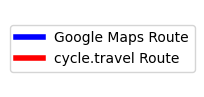

0

In [43]:
# make matplotlib legend with blue and red line
fig = plt.figure(figsize=(1, 1))
ax = fig.add_subplot(111)


# create the legend
legend = ax.legend(
    [
        plt.Line2D([0], [0], color="b", lw=4),
        plt.Line2D([0], [0], color="r", lw=4),
    ],
    ["Google Maps Route", "cycle.travel Route"],
    loc="center",
)
ax.axis("off")

# remove background
fig.patch.set_visible(False)

# show the plot
plt.show()

# save the plot
legend_buffer = io.BytesIO()
fig.savefig(
    legend_buffer,
    dpi=300,
    transparent=True,
    bbox_inches="tight",
)
legend_buffer.seek(0)

Now let's use Pillow to add the legend to the image:


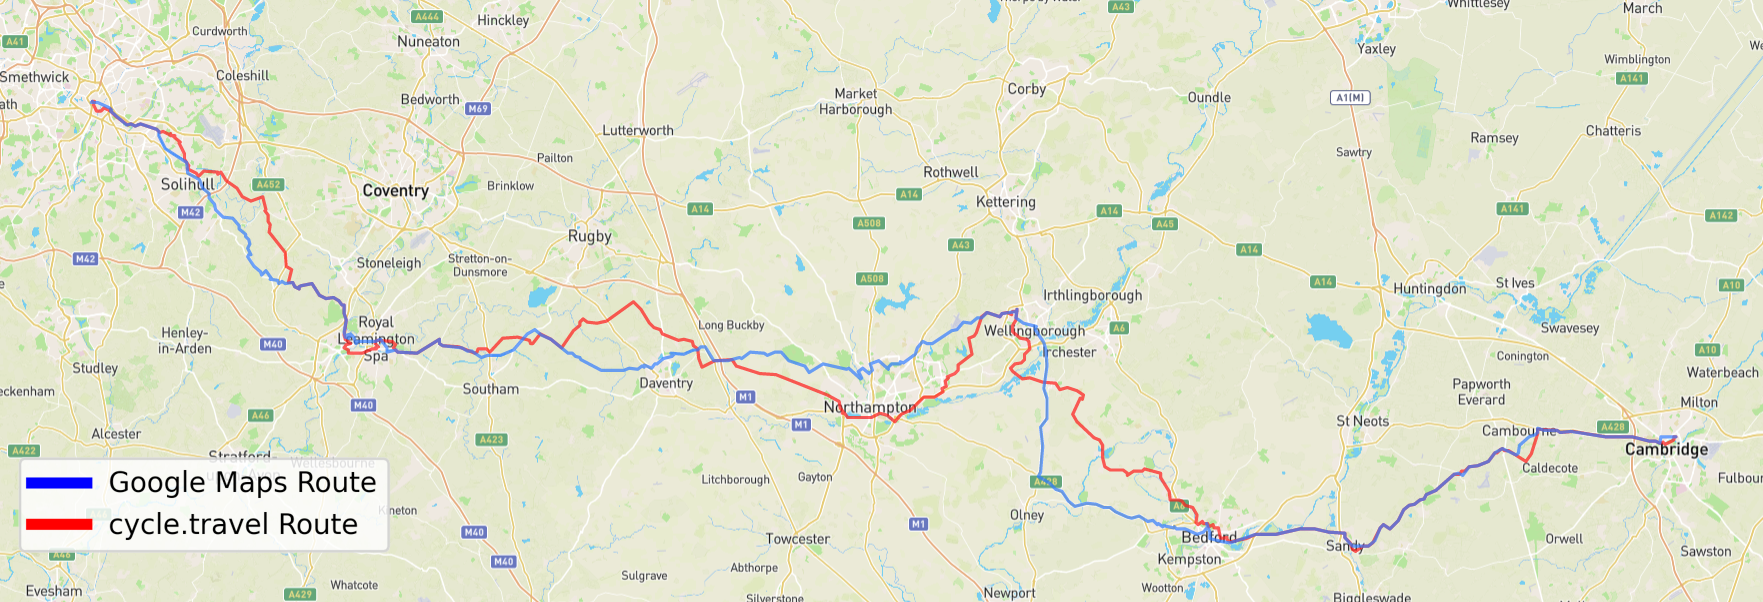

In [44]:
background = Image.open("../images/google_vs_cycle.travel_routes.png")
legend = Image.open(legend_buffer)

# paste in bottom left, scaled by 0.5
SCALE_FACTOR = 1.5
legend.thumbnail((legend.size[0] // SCALE_FACTOR, legend.size[1] // SCALE_FACTOR))
background.paste(legend, (0, background.size[1] - legend.size[1]), legend)
background.save(
    "../images/google_vs_cycle.travel_routes_with_legend.png",
    "PNG",
)
background

## Image Annotation

Let's annotate some images. Mainly this is to label "Birmingham" and "Cambridge" on the map.


### Google maps crow flies image

Original image:

![Google maps screenshot](../images/crow_flies_distance.png)


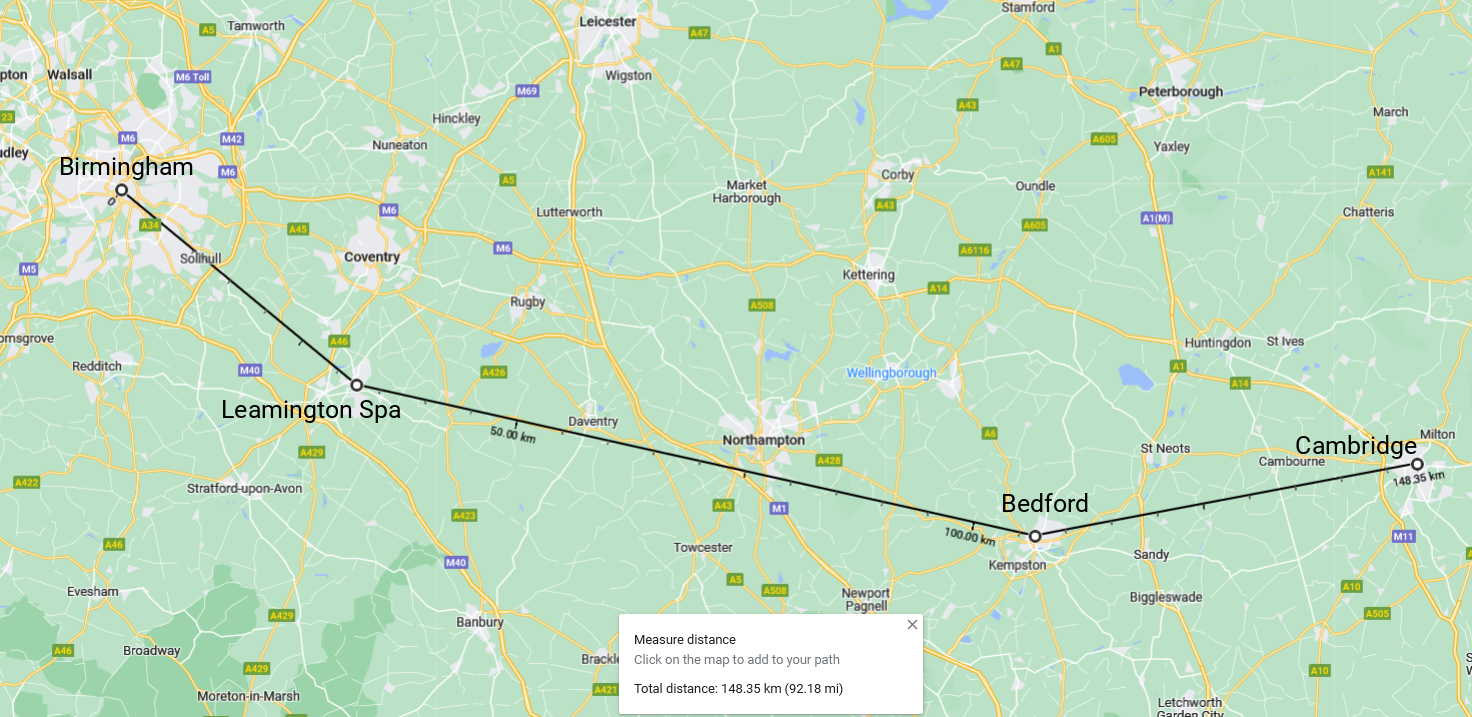

In [45]:
image = Image.open("../images/crow_flies_distance.png")
# add text
draw = ImageDraw.Draw(image)
font = ImageFont.truetype("./Roboto-Regular.ttf", 25)

bham = {
    "text": "Birmingham",
    "x": 0.04,
    "y": 0.21,
}
cam = {
    "text": "Cambridge",
    "x": 0.88,
    "y": 0.6,
}
leamington = {
    "text": "Leamington Spa",
    "x": 0.15,
    "y": 0.55,
}
bedford = {
    "text": "Bedford",
    "x": 0.68,
    "y": 0.68,
}
for city in [bham, cam, leamington, bedford]:
    draw.text(
        (
            image.size[0] * city["x"],
            image.size[1] * city["y"],
        ),
        city["text"],
        (0, 0, 0),
        font=font,
    )
image.save("../images/crow_flies_distance_annotated.png", "PNG")
image
